# Loosing Bank Customers 


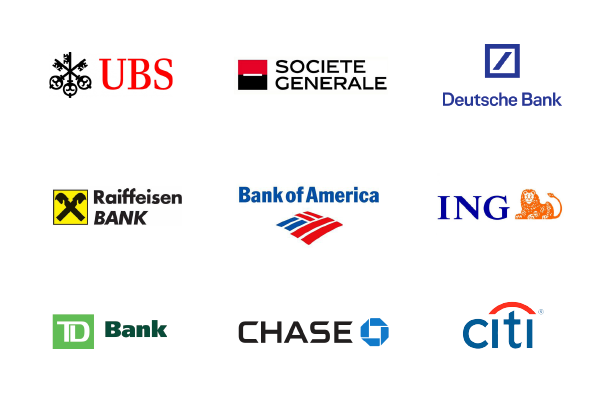





##  Problem statement:
- In the rapidly evolving banking sector, customer retention has become a critical concern. Banks are increasingly seeking to understand the factors that influence customer decisions to stay with or leave their banking service provider. This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.


##  Expectations:
- Through this project, you are expected to apply a variety of data analytics techniques ranging from descriptive statistics to hypothesis testing. By the end of this analysis, you should be able to:
* Identify and Understand Key Factors: Recognize which customer attributes significantly impact the likelihood of churn.
* Develop Analytical Skills: Enhance proficiency in using statistical tools and software for analyzing complex datasets.
* *enerate Insights: Produce actionable insights that could theoretically be used by a bank to improve customer retention strategies.
* Present Findings: Effectively communicate their findings and recommendations through clear, compelling visualizations and reports.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
print("Setup Complete!")

Setup Complete!


In [44]:
fin_df = pd.read_csv(r"D:\DSML\Case Studies\Fintech Churn Analysis\Bank-Records.csv")

In [45]:
fin_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [46]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [47]:
fin_df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [48]:
fin_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [49]:
fin_df.describe(include="object")

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [50]:
fin_df['IsActiveMember'] = fin_df['IsActiveMember'].map({0: 'No', 1: 'Yes'})
fin_df['Exited'] = fin_df['Exited'].map({0: 'No', 1: 'Yes'})
fin_df['HasCrCard'] = fin_df['HasCrCard'].map({0: 'No', 1: 'Yes'})
fin_df['Complain'] = fin_df['Complain'].map({0: 'No', 1: 'Yes'})

In [51]:
fin_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


### Non graphical Analysis

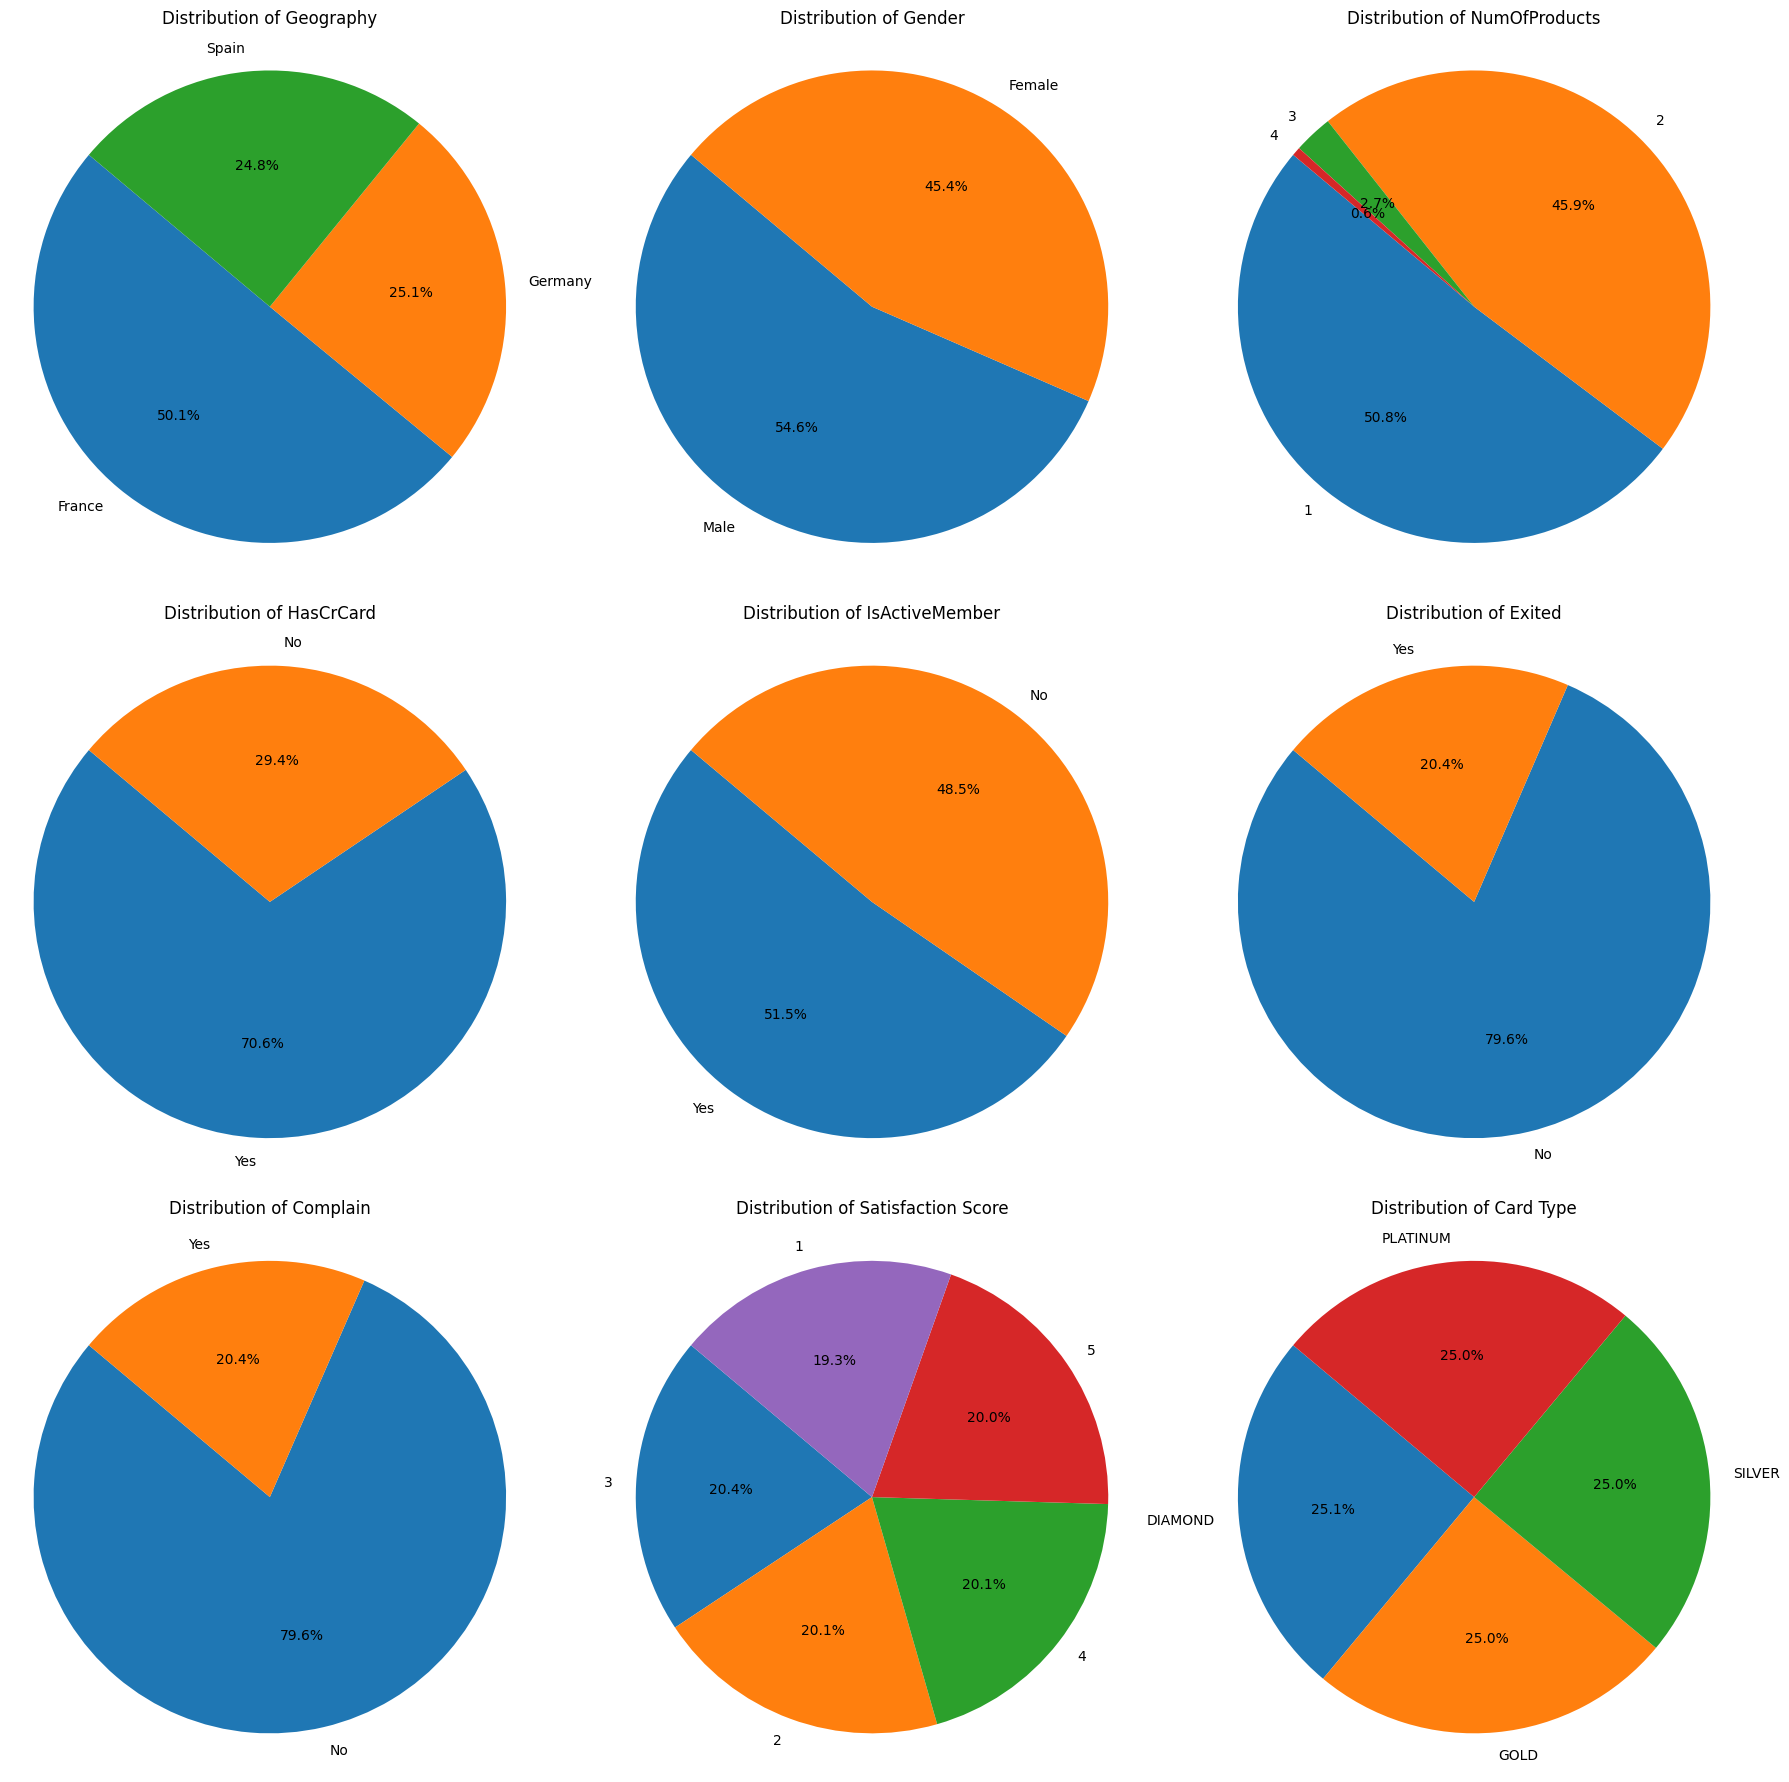

In [52]:
columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']

nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18))
axes = axes.flatten()  

for i, column in enumerate(columns):
    value_counts = fin_df[column].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal') 

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Observations :- 

- ~ 50% Customers are from France
- ~ 70% Customer have Credit Card
- There seems to be more Male as compared to Females but by small margin
- Complain and Exited seems to have some corelation since they have same numbers
- Marginally have large number of active members as compared to non-active members

## Univariate Annalysis

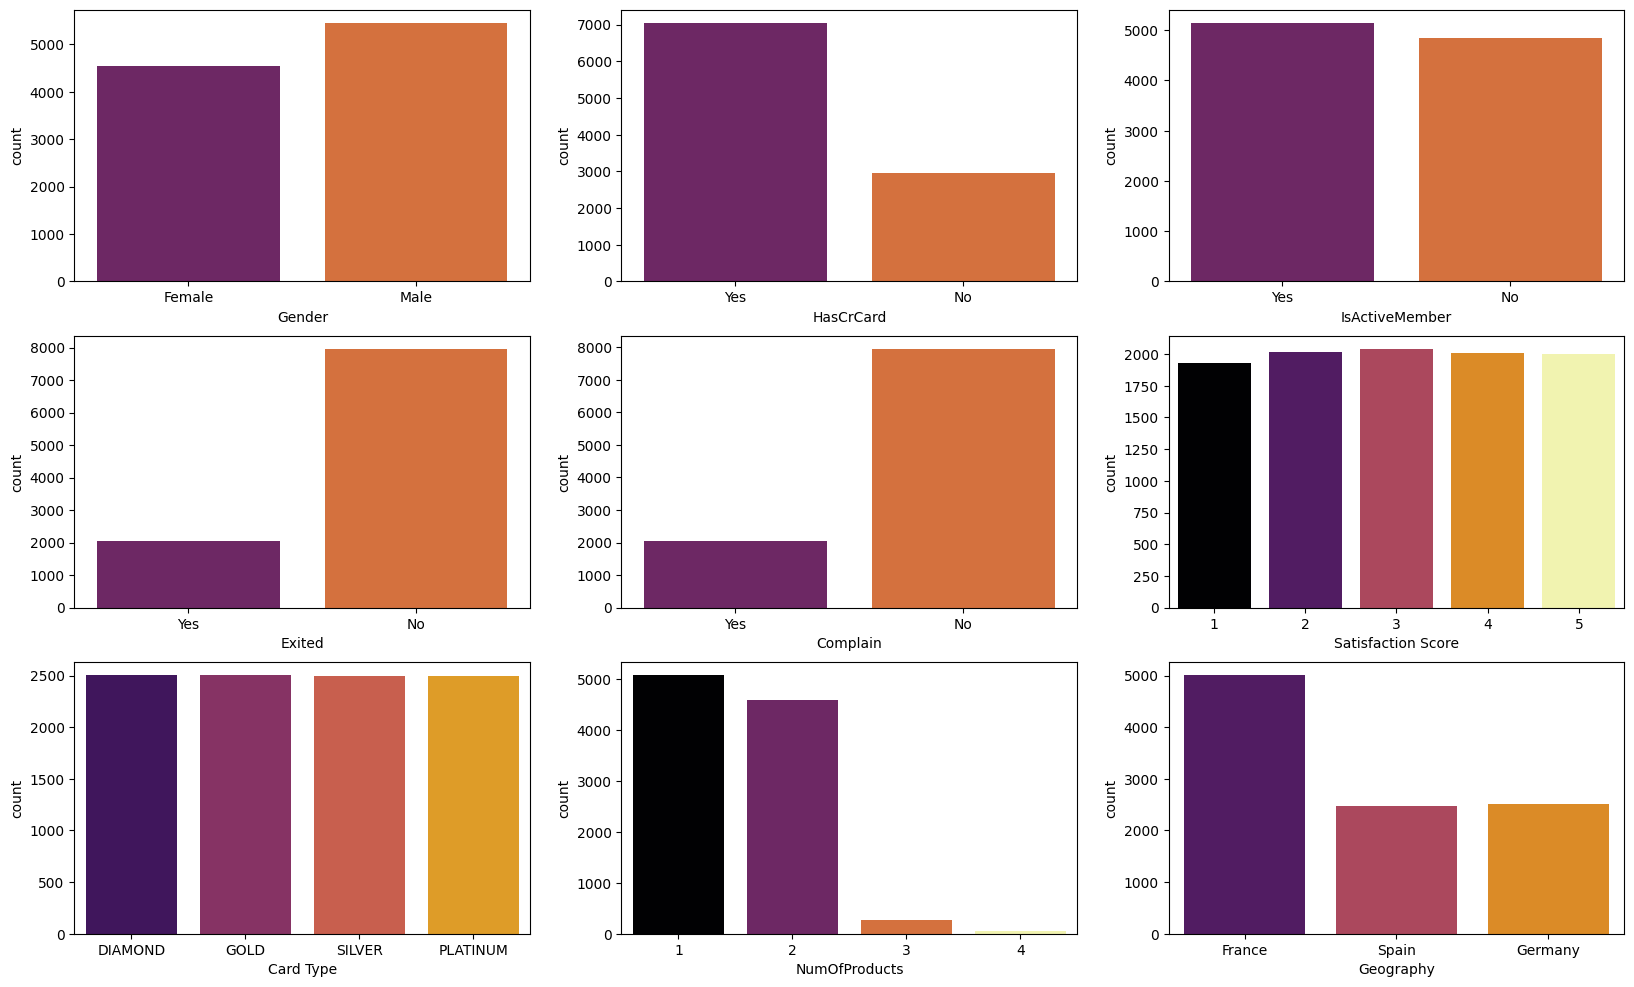

In [53]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20,12))
sns.countplot(data = fin_df, x = 'Gender', hue = 'Gender', ax = axs[0,0], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'HasCrCard', hue = 'HasCrCard', ax = axs[0,1], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'IsActiveMember', hue = 'IsActiveMember', ax = axs[0,2], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'Exited', hue = 'Exited', ax = axs[1,0], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'Complain', hue = 'Complain', ax = axs[1,1], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'Satisfaction Score', hue = 'Satisfaction Score', ax = axs[1,2], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'Card Type', hue = 'Card Type', ax = axs[2,0], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'NumOfProducts', hue = 'NumOfProducts', ax = axs[2,1], palette = 'inferno', legend=False)
sns.countplot(data = fin_df, x = 'Geography', hue = 'Geography', ax = axs[2,2], palette = 'inferno', legend=False)
plt.show()

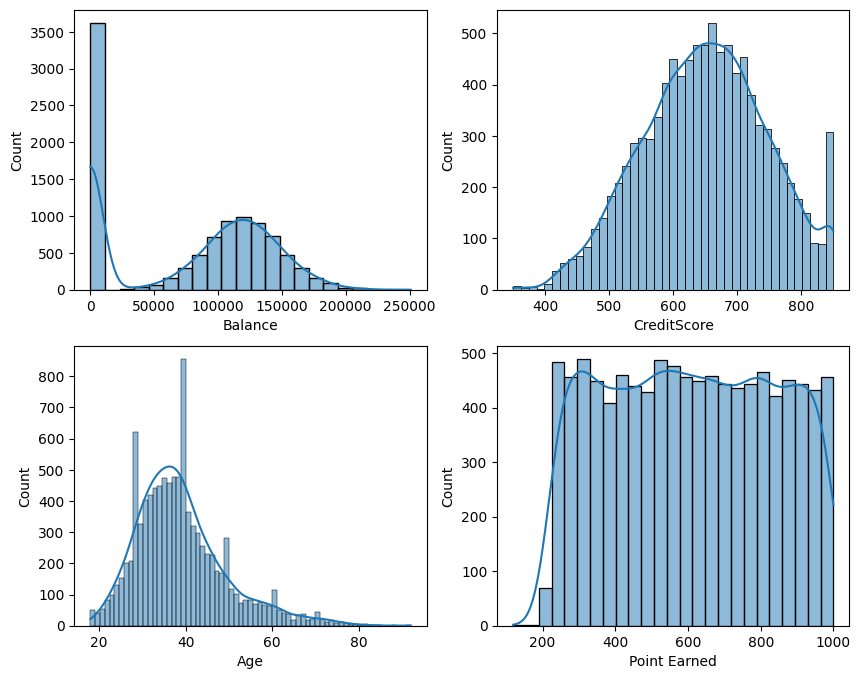

In [54]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
sns.histplot(data = fin_df, x = 'Balance', kde = True, ax = axs[0,0])
sns.histplot(data = fin_df, x = 'CreditScore', kde = True, ax = axs[0,1])
sns.histplot(data = fin_df, x = 'Age', kde = True, ax = axs[1,0])
sns.histplot(data = fin_df, x = 'Point Earned', kde = True, ax = axs[1,1])
plt.show()

## Observations 

- more than 3500 customer have 0 Balance 
- 40 is the mode age in the data

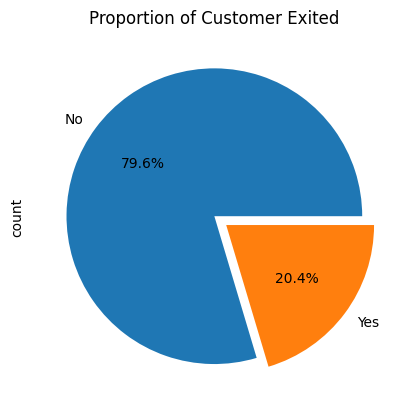

In [55]:
fin_df['Exited'].value_counts().plot.pie(autopct = '%.1f%%', explode = (0,0.1))
plt.title('Proportion of Customer Exited')
plt.show()

## Observations 

- 20.4% is the churn rate

## Bivariate Analysis

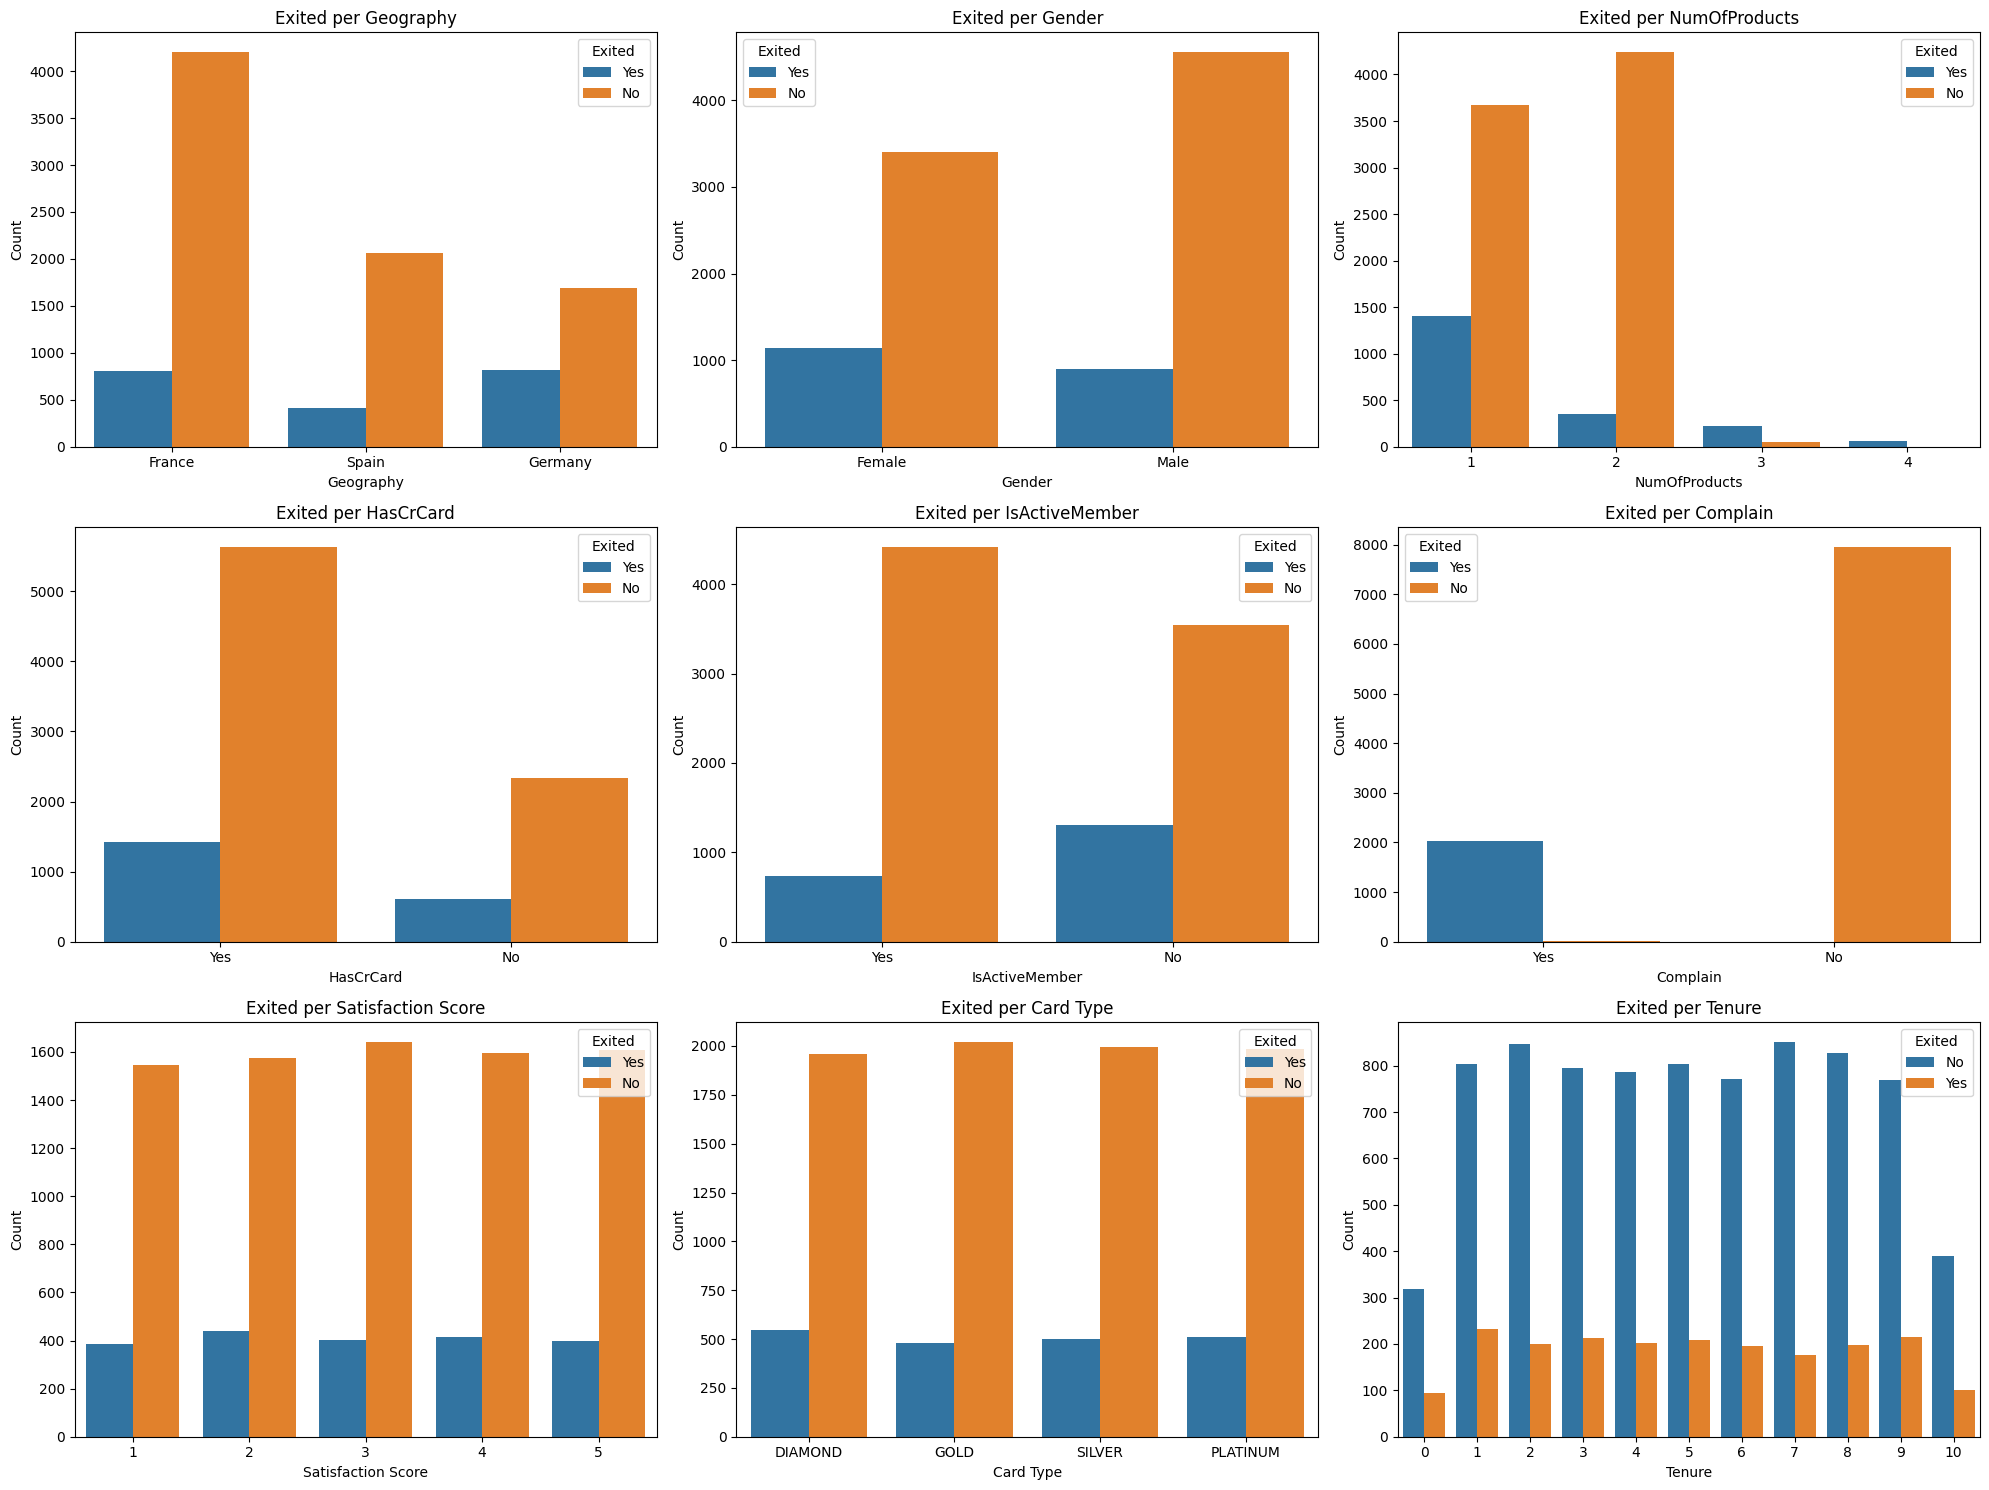

In [56]:
s = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Card Type','Tenure']

nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()  


for i, column in enumerate(s):
    sns.countplot(data=fin_df, x=column, hue='Exited', ax=axes[i])
    axes[i].set_title(f'Exited per {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

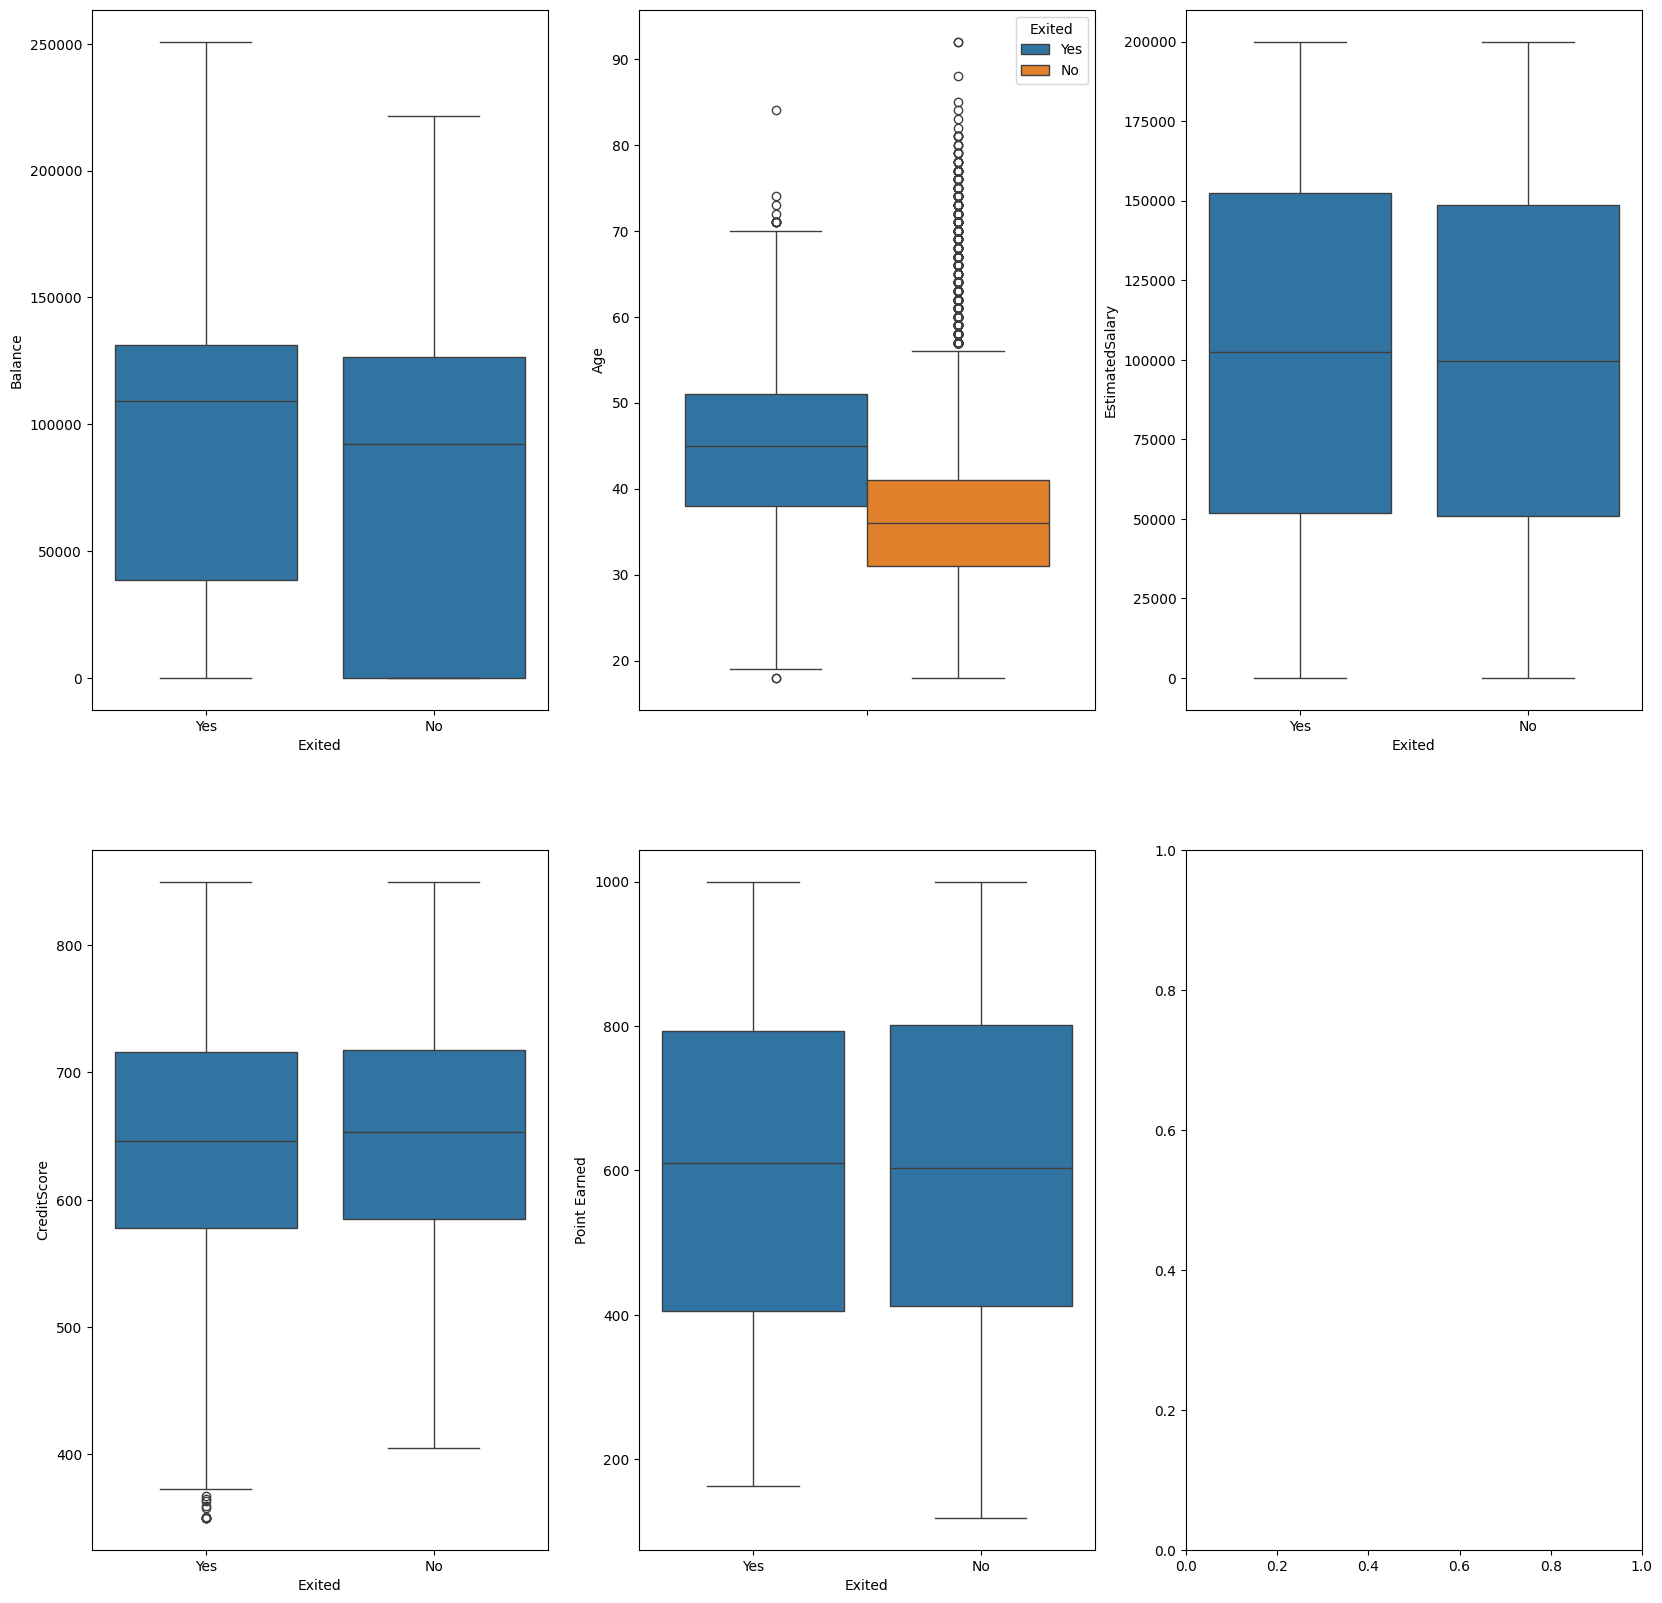

In [57]:
fig, axs = plt.subplots(nrows = 2, ncols= 3 ,figsize = (20,20))

sns.boxplot(data = fin_df, y = 'Balance', x = 'Exited', ax = axs[0,0])

sns.boxplot(data = fin_df, y = 'Age', hue = 'Exited', ax= axs[0,1])

sns.boxplot(data = fin_df, y = 'EstimatedSalary', x = 'Exited', ax= axs[0,2])

sns.boxplot(data = fin_df, x = 'Exited', y = 'CreditScore', ax= axs[1,0])

sns.boxplot(data = fin_df, x = 'Exited', y = 'Point Earned', ax= axs[1,1])

plt.show()



## Correlation between fields

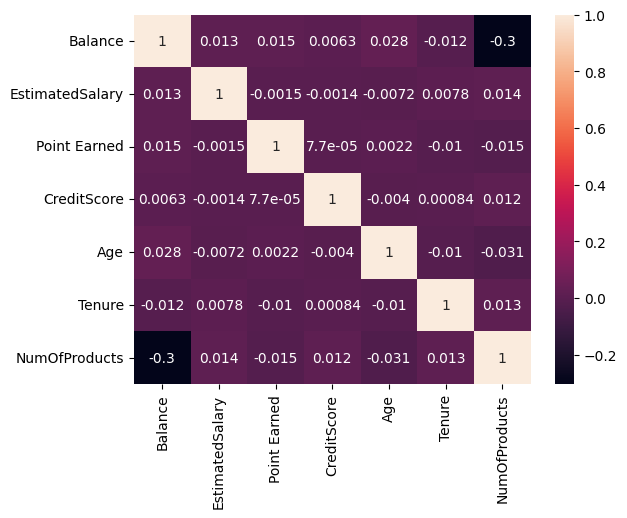

In [58]:
numeric_corr = ['Balance','EstimatedSalary', 'Point Earned', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts']
corr = fin_df[numeric_corr].corr()
sns.heatmap(data = corr, annot = True)
plt.show()

## Observations 

- Low Correlations
- Most of the variables show very low correlation values (close to 0), suggesting weak or no linear relationships among most pairs.
- The highest correlation observed is between Balance and NumOfProducts (-0.3), which is still considered a moderate correlation.

## 0 Balance customer

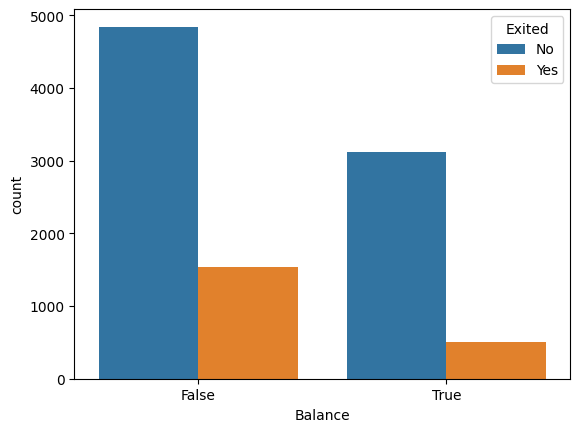

In [59]:
sns.countplot(data = fin_df, x = fin_df['Balance'] == 0, hue = 'Exited')
plt.show()

In [60]:
total_zero_balance = ((fin_df['Balance'] == 0) & (fin_df['Exited'] == 1)).sum()
total_zero_balance

0

## Churn Rate Calculations 

In [61]:
fin_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes,Yes,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No,No,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes,Yes,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No,No,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,Yes,Yes,71725.73,No,No,3,GOLD,342


In [62]:
fin_df['Exited'] = fin_df['Exited'].map({'No': 0, 'Yes': 1})
churn_counts_geo = fin_df.groupby('Geography')['Exited'].sum()
total_counts_geo = fin_df.groupby('Geography')['Exited'].count()

churn_rate_by_geography = (churn_counts_geo / total_counts_geo) * 100
print(churn_rate_by_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [63]:
churn_counts_gender = fin_df.groupby('Gender')['Exited'].sum()
total_counts_gender = fin_df.groupby('Gender')['Exited'].count()

churn_rate_by_geography = (churn_counts_gender / total_counts_gender) * 100
print(churn_rate_by_geography)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


In [64]:
churn_counts_tenure = fin_df.groupby('Tenure')['Exited'].sum()
total_counts_tenure = fin_df.groupby('Tenure')['Exited'].count()

churn_rate_by_geography = (churn_counts_tenure / total_counts_tenure) * 100
print(churn_rate_by_geography)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


In [65]:
churn_counts_products = fin_df.groupby('NumOfProducts')['Exited'].sum()
total_counts_products = fin_df.groupby('NumOfProducts')['Exited'].count()

churn_rate_by_geography = (churn_counts_products / total_counts_products) * 100
print(churn_rate_by_geography)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


In [66]:
hascard_churn_rate = fin_df.groupby('HasCrCard')['Exited'].mean() * 100
hascard_churn_rate

HasCrCard
No     20.814941
Yes    20.198441
Name: Exited, dtype: float64

In [67]:
IsActiveMember_churn_rate = fin_df.groupby('IsActiveMember')['Exited'].mean() * 100
IsActiveMember_churn_rate

IsActiveMember
No     26.871520
Yes    14.269074
Name: Exited, dtype: float64

In [68]:
Complain_churn_rate = fin_df.groupby('Complain')['Exited'].mean() * 100
Complain_churn_rate

Complain
No      0.050277
Yes    99.510763
Name: Exited, dtype: float64

In [69]:
Satisfaction_Score_churn_rate = fin_df.groupby('Satisfaction Score')['Exited'].mean() * 100
Satisfaction_Score_churn_rate

Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: Exited, dtype: float64

In [70]:
Card_Type_churn_rate = fin_df.groupby('Card Type')['Exited'].mean() * 100
Card_Type_churn_rate

Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64

In [71]:
bins = [18,30,45,58,75,93]
labels = ['18-29','30-44','45-57','58-74','75-92']

fin_df['Age_bin'] = pd.cut(fin_df['Age'], bins = bins, labels = labels, right = False)
fin_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_bin
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,Yes,2,DIAMOND,464,30-44
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,Yes,3,DIAMOND,456,30-44
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,Yes,3,DIAMOND,377,30-44
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0,No,5,GOLD,350,30-44
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,No,5,GOLD,425,30-44


In [72]:
Age_bin_churn_rate = fin_df.groupby('Age_bin', observed=False)['Exited'].mean() * 100
Age_bin_churn_rate

Age_bin
18-29     7.556368
30-44    14.454228
45-57    49.732938
58-74    34.109817
75-92     1.851852
Name: Exited, dtype: float64

## For Numerical Columns 

In [73]:
CreditScore_churn_rate = (fin_df[fin_df['Exited'] == 1]['CreditScore'].mean() * 100).round(2)
print(f'Churned Customer for Credit Score: {CreditScore_churn_rate}')

CreditScore_churn_rate = (fin_df[fin_df['Exited'] == 0]['CreditScore'].mean() * 100).round(2)
print(f'Non Churned Customer for Credit Score: {CreditScore_churn_rate}')

Churned Customer for Credit Score: 64541.46
Non Churned Customer for Credit Score: 65183.79


In [74]:
Age_churn_rate = (fin_df[fin_df['Exited'] == 1]['Age'].mean() * 100).round(2)
print(f'Churned Customer for Age: {Age_churn_rate}')

Age_churn_rate = (fin_df[fin_df['Exited'] == 0]['Age'].mean() * 100).round(2)
print(f'Non Churned Customer for Age: {Age_churn_rate}')

Churned Customer for Age: 4483.56
Non Churned Customer for Age: 3740.81


In [75]:
Balance_churn_rate = (fin_df[fin_df['Exited'] == 1]['Balance'].mean() * 100).round(2)
print(f'Churned Customer for Balance: {Balance_churn_rate}')

Balance_churn_rate = (fin_df[fin_df['Exited'] == 0]['Balance'].mean() * 100).round(2)
print(f'Non Churned Customer for Balance: {Balance_churn_rate}')

Churned Customer for Balance: 9110947.6
Non Churned Customer for Balance: 7274275.07


In [76]:
EstimatedSalary_churn_rate = (fin_df[fin_df['Exited'] == 1]['EstimatedSalary'].mean() * 100).round(2)
print(f'Churned Customer for EstimatedSalary: {EstimatedSalary_churn_rate}')

EstimatedSalary_churn_rate = (fin_df[fin_df['Exited'] == 0]['EstimatedSalary'].mean() * 100).round(2)
print(f'Non Churned Customer for EstimatedSalary: {EstimatedSalary_churn_rate}')

Churned Customer for EstimatedSalary: 10150990.88
Non Churned Customer for EstimatedSalary: 9972685.31


## Observations

- It is cleared that 99% complaints are not resolved
- Germany have higher churn rate
- Females are more likey to churn
- Those with 3 or more number of products are more likely to churn

## Hypothesis Testing 

### Satisfaction Score Vs Complain

- Null Hypothesis : There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain

- Alternative Hypothesis : There is significant difference in satisfaction score of customer who have exited with complain and exited without complain

In [77]:
satis_com = pd.crosstab(fin_df[fin_df['Exited'] == 1]['Satisfaction Score'], fin_df['Complain'])

chi2, pval, a, b = chi2_contingency(satis_com)
alpha = 0.05

if pval<alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis


## Observations 

- There is significant difference in satisfaction score of customer who have exited with complain and exited without complain

###  Geography and Customer Churn

- Null Hypothesis : There is no association between the geographical locations of the customer and exiting the Bank

- Alternative Hypothesis : There is association between the geographical locations of the customer and exiting the Bank

In [78]:
geo_exit = pd.crosstab(fin_df['Exited'], fin_df['Geography'])

stest, pval, a, b = chi2_contingency(geo_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observations 

-  There is association between the geographical locations of the customer and exiting the Bank

### Gender Vs Customer Churn

- Null Hypothesis : There is no association between the Gender and customer exiting the bank

- Alternative Hypothesis : These is association between the Gender and customer exiting the bank

In [79]:
gen_exit = pd.crosstab(fin_df['Exited'], fin_df['Gender'])

stest, pval, a, b = chi2_contingency(gen_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observations

- These is association between the Gender and customer exiting the bank

## Number Of Products Vs Customer Churn

Null Hypothesis : There is no significant difference between the Number of products customer buying and exiting the bank

Alternative Hypothesis : There is significant difference between the Number of products customer buying and exiting the bank

In [80]:
num_exit = pd.crosstab(fin_df['Exited'], fin_df['NumOfProducts'])

stest, pval, a, b = chi2_contingency(num_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observations

- There is significant difference between the Number of products customer buying and exiting the bank

## IsActiveMember Vs Customer Churn

- Null Hypothesis : There is no association betweeen Active Customer and exiting the bank

- Alternative Hypothesis : There is an association betweeen Active Customer and exiting the bank

In [81]:
act_exit = pd.crosstab(fin_df['Exited'], fin_df['IsActiveMember'])

stest, pval, a, b = chi2_contingency(act_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observation

- There is an association betweeen Active Customer and exiting the bank

## Complain Vs Customer Churn

- Null Hypothesis : There is no association between complain by customers and exiting the bank

- Alternative Hypothesis : There is association between complain by customers and exiting the bank

In [82]:
com_exit = pd.crosstab(fin_df['Exited'], fin_df['Complain'])

stest, pval, a, b = chi2_contingency(com_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observation

- There is association between complain by customers and exiting the bank

## Credit Score Vs Customer Churn

Null Hypothesis : There is no significant difference between the mean of credit score who exited the bank and not exited the bank

Alternative Hypothesis : There is significant difference between the mean of credit score who exited the bank and not exited the bank

In [83]:
c_exited = fin_df[fin_df['Exited'] == 1]['CreditScore']
c_stayed = fin_df[fin_df['Exited'] == 0]['CreditScore']

alpha = 0.05
stats, pval = ttest_ind(c_stayed, c_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observation 

- There is significant difference between the mean of credit score who exited the bank and not exited the bank

## Age Vs Customer Churn

- Null Hypothesis : There is no significant difference between the mean age of the customer who exited and not exited

- Alternative Hypothesis : There is significant difference between the mean age of the customer who exited and not exited

In [84]:
a_exited = fin_df[fin_df['Exited'] == 1]['Age']
a_stayed = fin_df[fin_df['Exited'] == 0]['Age']

alpha = 0.05
stats, pval = ttest_ind(a_stayed, a_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observation 

- There is significant difference between the mean age of the customer who exited and not exited

## Balance Vs Customer Churn

- Null Hypothesis : There is no significant difference between the mean balance of the customer who exited and not exited

- Alternative Hypothesis : There is significant difference between the mean balance of the customer who exited and not exited

In [85]:
b_exited = fin_df[fin_df['Exited'] == 1]['Balance']
b_stayed = fin_df[fin_df['Exited'] == 0]['Balance']

alpha = 0.05
stats, pval = ttest_ind(b_stayed, b_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


## Observation

-  There is significant difference between the mean balance of the customer who exited and not exited

## Actionable Insights

- **Expand Marketing Efforts in Germany and Spain**: Since 50% of customers are from France, focus marketing campaigns on Germany and Spain to boost customer acquisition in these regions.

- **Develop Targeted Offers for Female Customers**: Introduce specific products or offers aimed at attracting more female customers to balance the customer demographics.

- **Enhance After-Sales Service**: Address the fact that almost 99% of customers who filed complaints have left the bank by significantly improving the after-sales service experience.

- **Create Retention Strategies for Multi-Product Holders**: Implement targeted retention strategies for customers with three or more products, as they have a higher churn rate.

- **Engage Zero Balance Account Holders**: Investigate why approximately 3,000 accounts have zero balance and develop offers or incentives to engage these customers and encourage account usage.

- **Financial Counseling for At-Risk Customers**: Analyze factors influencing customer exit versus retention and offer financial counseling to customers in vulnerable salary brackets to reduce churn.

## Customer Segmentaions

In [86]:
balance_bins = [-float('inf'), 0, 10000, 50000, float('inf')]
num_products_bins = [1, 2, 3, float('inf')]
fin_df['Balance_bin'] = pd.cut(fin_df['Balance'], bins=balance_bins, labels=['Very Low', 'Low', 'Medium', 'High'])
fin_df['NumOfProducts_bin'] = pd.cut(fin_df['NumOfProducts'], bins=num_products_bins, labels=['1-2', '3', '4+'])
satisfaction_bins = [0, 5, 7, 10]
salary_bins = [-float('inf'), 50000, 100000, float('inf')]
points_bins = [0, 1000, 5000, float('inf')]
fin_df['Satisfaction_bin'] = pd.cut(fin_df['Satisfaction Score'], bins=satisfaction_bins, labels=['Low', 'Medium', 'High'])
fin_df['Salary_bin'] = pd.cut(fin_df['EstimatedSalary'], bins=salary_bins, labels=['Low', 'Medium', 'High'])
fin_df['Points_bin'] = pd.cut(fin_df['Point Earned'], bins=points_bins, labels=['Low', 'Medium', 'High'])



In [87]:
segments = fin_df.groupby(['Gender', 'Balance_bin', 'NumOfProducts_bin','Satisfaction_bin', 'Salary_bin', 'Points_bin'], observed = True).size().reset_index(name='Count')

In [88]:
segments

,Gender,Balance_bin,NumOfProducts_bin,Satisfaction_bin,Salary_bin,Points_bin,Count
0,Female,Very Low,1-2,Low,Low,Low,294
1,Female,Very Low,1-2,Low,Medium,Low,273
2,Female,Very Low,1-2,Low,High,Low,594
3,Female,Very Low,3,Low,Low,Low,9
4,Female,Very Low,3,Low,Medium,Low,23
5,Female,Very Low,3,Low,High,Low,21
6,Female,Very Low,4+,Low,Low,Low,1
7,Female,Very Low,4+,Low,Medium,Low,2
8,Female,Very Low,4+,Low,High,Low,5
9,Female,Low,1-2,Low,High,Low,1
